In [27]:
import __init__
import numpy as np
import os
import pandas as pd
from datapath_manager import ITWDataPathManager, DataPathManager
from date_time_utils import get_date_time_from_float, convert_utc_to_local_time
from trainers import MachineLearningModelTrainer, BranchNeuralNetworkTrainer
import matplotlib.pyplot as plt
from dataloader import EmbeddingDataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import yaml, torch
from collections import Counter
from combine_features_itw import ITWFeatureCombiner
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
import shap

In [28]:
dataset_name = 'DCU_EXP2_ITW'
user_id = 'lzhou'
date = '2022-09-12'

trained_dataset_name = 'DCU_NVT_EXP2'
dl_model_name = 'branch_neural_network'
ml_model_name = 'extra_trees'
model_type = 'dependent'
signal_type = 'bvp'
window_size = 60
window_shift = 0.25

In [29]:
def get_pretrained_model(model_name):
    ds_path_manager = DataPathManager(trained_dataset_name)
    user_model_saved_path = ds_path_manager.get_saved_model_path(user_id, model_name, f'{model_type}_{signal_type}', window_size, window_shift)
    user_model_saved_path = user_model_saved_path.replace(signal_type + '_', '')
    print(user_model_saved_path)
    if model_name == 'branch_neural_network':
        config_path = os.path.join(os.path.dirname(os.getcwd()), 'models', 'model_config', f'branchnn_sensor_combination_{signal_type}.yaml')
        config_dict = yaml.safe_load(open(config_path, 'r'))
        model = BranchNeuralNetworkTrainer('.', user_model_saved_path, config_dict, target_metrics=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1'])
    else:
        model = MachineLearningModelTrainer(user_model_saved_path, model_name, eval_mode = True, target_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1'])
    return model

In [30]:
dataset_path = ITWDataPathManager(dataset_name).get_dataset_path()
user_date_path = os.path.join(dataset_path, 'data', user_id, date, 'Lifelog')

user_date_feature_path = os.path.join(dataset_path, 'features', user_id, date)
feature_path = os.path.join(user_date_feature_path, f'{signal_type}.npy')
metadata_path = os.path.join(user_date_feature_path, 'metadata.csv')
feature_names = [line.strip() for line in open('feature_names.txt', 'r').readlines()]
# labels_path = os.path.join(user_date_feature_path, 'stress_state.npy')

In [31]:
metadata = pd.read_csv(metadata_path)

In [32]:
features = np.nan_to_num(np.load(feature_path))
gt = np.zeros(features.shape[0])
test_dataloader = EmbeddingDataLoader(features, gt)

/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent_bvp/branch_neural_network/lzhou_branch_neural_network_dependent_60_0.25.pth
LOAD PRETRAINED MODEL
{'accuracy': 0.4330032188961542, 'balanced_accuracy': 0.4330032188961542, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


y_pred contains classes not in y_true
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


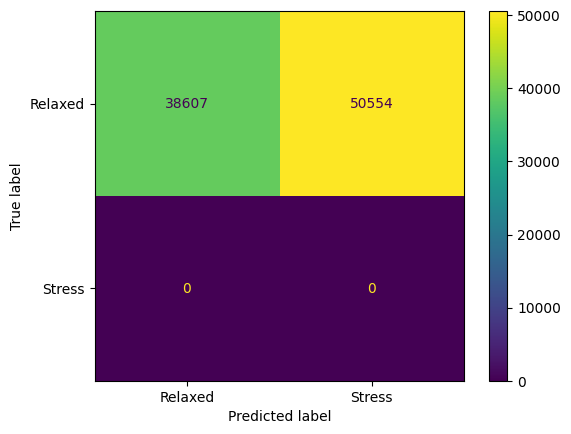

In [33]:
dl_model = get_pretrained_model(dl_model_name)
y_pred = dl_model.predict(test_dataloader)
print(dl_model.predict_and_evaluate(test_dataloader))
ConfusionMatrixDisplay.from_predictions(gt, y_pred, display_labels=['Relaxed', 'Stress'])

/mnt/DATA/nvtu/PhD/stress_data/DCU_NVT_EXP2/models/60_0.25/dependent_bvp/extra_trees/lzhou_extra_trees_dependent_60_0.25.joblib
LOAD PRETRAINED MODEL
{'accuracy': 0.5795583270712531, 'balanced_accuracy': 0.5795583270712531, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


y_pred contains classes not in y_true
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


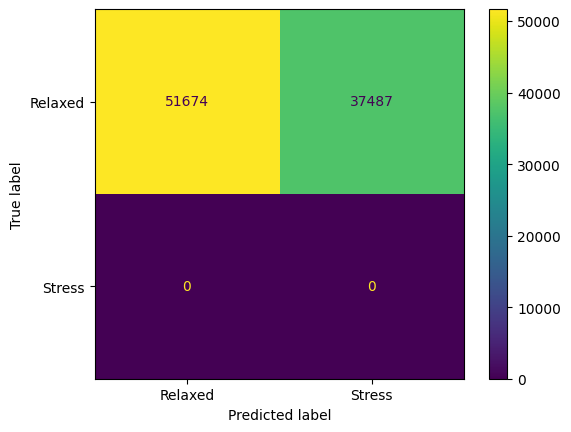

In [34]:
ml_model = get_pretrained_model(ml_model_name)
y_pred = ml_model.predict(test_dataloader)
print(ml_model.predict_and_evaluate(test_dataloader))
ConfusionMatrixDisplay.from_predictions(gt, y_pred, display_labels=['Relaxed', 'Stress'])

In [35]:
fp = [i for i in range(len(y_pred)) if y_pred[i] == 1 and gt[i] == 0]
fp_data = metadata.loc[metadata.index[fp]]
fp_data.to_csv(f'{user_id}_{date}_fp_{signal_type}.csv')

In [36]:
fp

[3,
 206,
 207,
 208,
 209,
 210,
 211,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 515,
 516,
 517,
 518,
 519,
 521,
 522,
 529,
 530,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 559,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 1215,
 1219,
 1220,
 1221,
 1228,
 1229,
 1230,
 1231,
 1232,
 1233,
 1234,
 1235,
 1236,
 1237

In [37]:
explainer = shap.TreeExplainer(ml_model.model)
shap_values = explainer.shap_values(features[:1000])

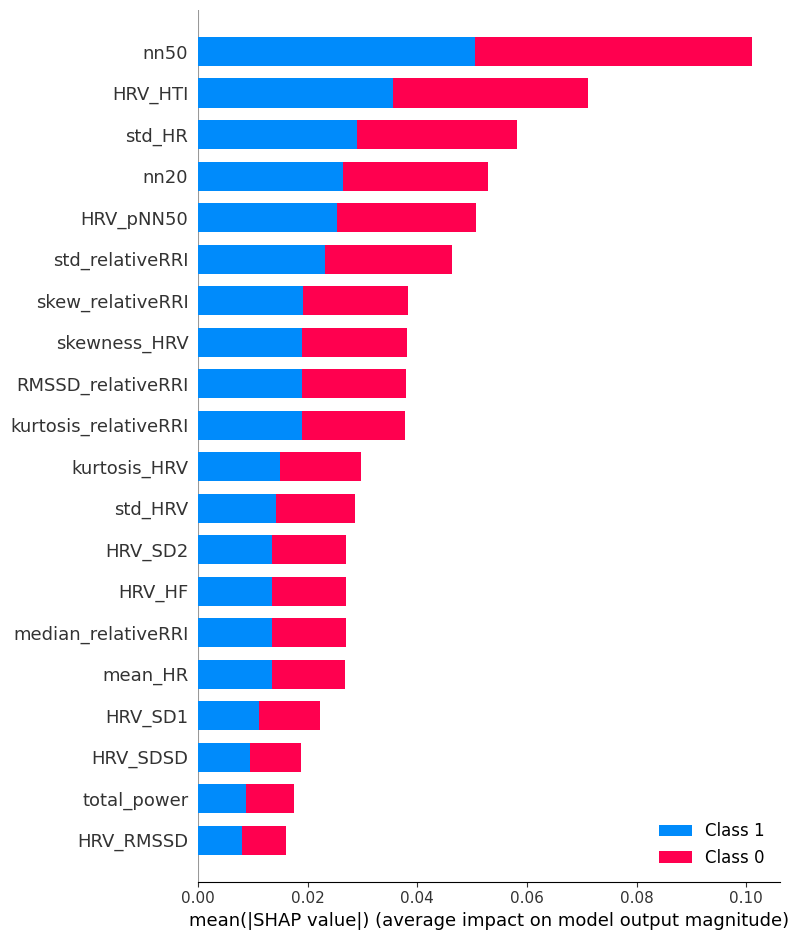

In [38]:
shap.summary_plot(shap_values, features[:1000], feature_names=feature_names[:66])

In [39]:
shap_value = explainer.shap_values(features[0])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value[1], features[0], feature_names=feature_names[:30])